# Stars: 

### Day 22: Sand Slabs

#### Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def get_data(file_name):
    with open(file_name, "r") as file:
        lines = file.read() 
    lines = lines.split("\n")
    return lines

In [3]:
def get_coord_pairs(lines):
    coord_pairs = []
    for line in lines:
        pair = line.split("~")
        coord_pair = []
        for item in pair:
            coord = item.split(",")
            coord = [int(x) for x in coord]
            coord_pair.append(coord)
        coord_pairs.append(coord_pair)
    return coord_pairs

In [4]:
def plot_bricks(bricks, view=None):

    # Get x, y, z coordinates
    x_coords = [[brick[0][0], brick[1][0]] for brick in bricks]
    y_coords = [[brick[0][1], brick[1][1]] for brick in bricks]
    z_coords = [[brick[0][2], brick[1][2]] for brick in bricks]

    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot each brick
    for i in range(len(bricks)):
        ax.plot(x_coords[i], y_coords[i], z_coords[i], linewidth=10)

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Rotate the plot
    if view == "XZ" or view == "ZX":
        ax.view_init(elev=0, azim=90)
    elif view == "YZ" or view == "ZY":
        ax.view_init(elev=0, azim=180)
    elif view == "XY" or view == "YX":
        ax.view_init(elev=90, azim=0)
    else:
        ax.view_init(elev=30, azim=45)

    plt.show()

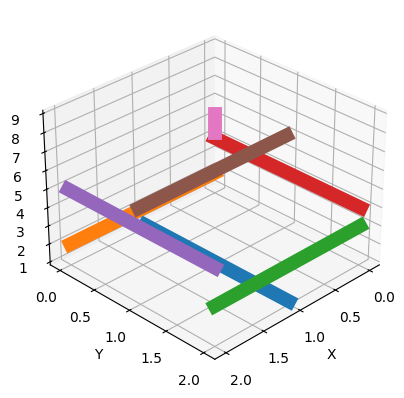

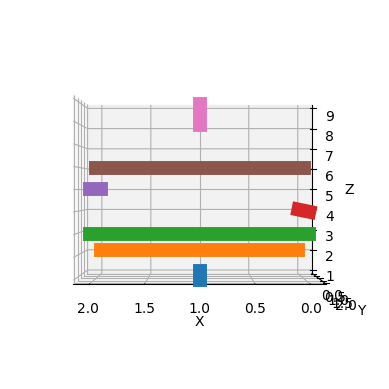

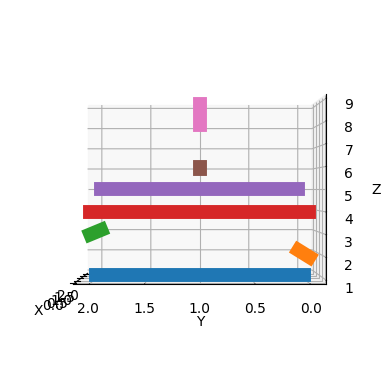

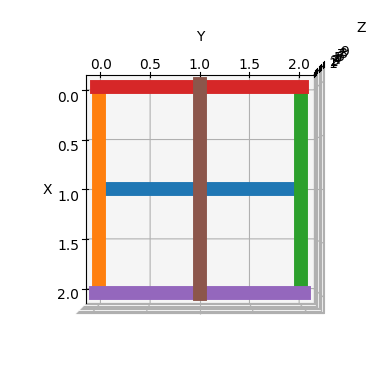

In [25]:
# display bricks
bricks = get_data("test_input.txt")
bricks = get_coord_pairs(bricks)
plot_bricks(bricks)
plot_bricks(bricks, view="ZX")
plot_bricks(bricks, view="ZY")
plot_bricks(bricks, view="XY")

In [28]:
# sort by first coord z value
bricks = sorted(bricks, key=lambda x: x[0][2])
bricks

[[[1, 0, 1], [1, 2, 1]],
 [[0, 0, 2], [2, 0, 2]],
 [[0, 2, 3], [2, 2, 3]],
 [[0, 0, 4], [0, 2, 4]],
 [[2, 0, 5], [2, 2, 5]],
 [[0, 1, 6], [2, 1, 6]],
 [[1, 1, 8], [1, 1, 9]]]

[[1, 0, 1], [1, 2, 1]] Stablised
New: [[0, 0, 2], [2, 0, 2]] -> [[0, 0, 1], [2, 0, 1]]
New: [[0, 2, 3], [2, 2, 3]] -> [[0, 2, 2], [2, 2, 2]]
New: [[0, 0, 4], [0, 2, 4]] -> [[0, 0, 3], [0, 2, 3]]
New: [[2, 0, 5], [2, 2, 5]] -> [[2, 0, 4], [2, 2, 4]]
New: [[0, 1, 6], [2, 1, 6]] -> [[0, 1, 5], [2, 1, 5]]
New: [[1, 1, 8], [1, 1, 9]] -> [[1, 1, 7], [1, 1, 8]]


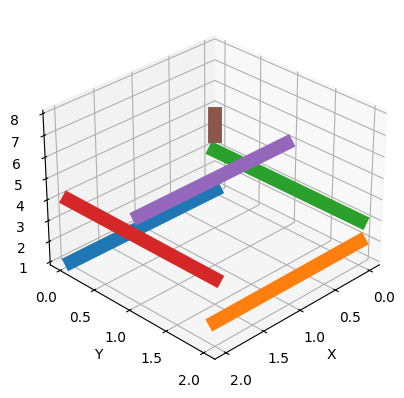

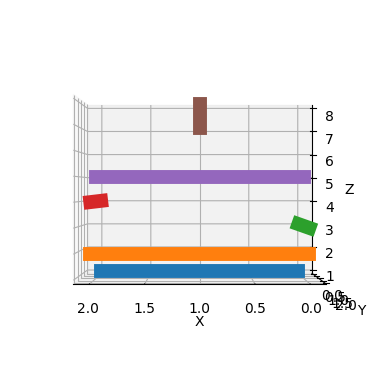

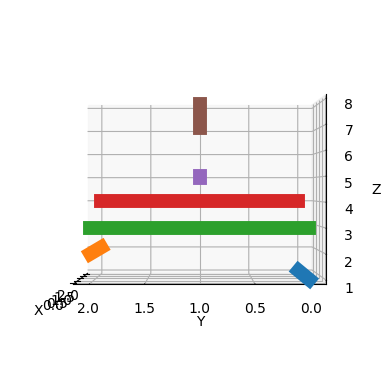

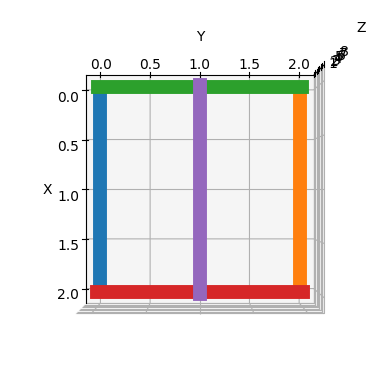

In [36]:
i = 0
new_bricks = []
for brick in bricks:
    start, end = brick
    z_start = start[2]
    z_end = end[2]
    if z_start == 1 or z_end == 1:
        print(brick, "Stablised")
    else:
        new_start = [z1 - z2 for z1, z2 in zip(start, [0, 0, 1])]
        new_end = [z1 - z2 for z1, z2 in zip(end, [0, 0, 1])]
        new_brick = [new_start, new_end]
        new_bricks.append(new_brick)
        print("New:", brick, "->", new_brick)
    i += 1
    # if i == 5: break

plot_bricks(new_bricks)
plot_bricks(new_bricks, view="ZX")
plot_bricks(new_bricks, view="ZY")
plot_bricks(new_bricks, view="XY")